In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_1524\3506205669.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

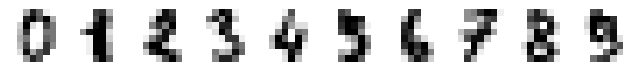

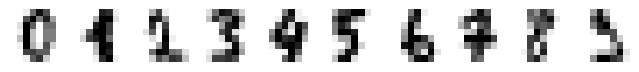

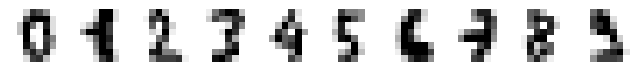

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
N = 30
nrows = (N//10)
 
for row in range(nrows):
    plt.figure(figsize=(8, 8))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(digits.images[i + row*10], cmap=plt.cm.gray_r, 
                   interpolation='nearest')
        plt.axis("off")
    plt.show()

In [3]:
from sklearn.svm import SVC
model = SVC().fit(X, y)
model

SVC()

In [4]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [6]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

CPU times: total: 1min 1s
Wall time: 1min 2s


In [8]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

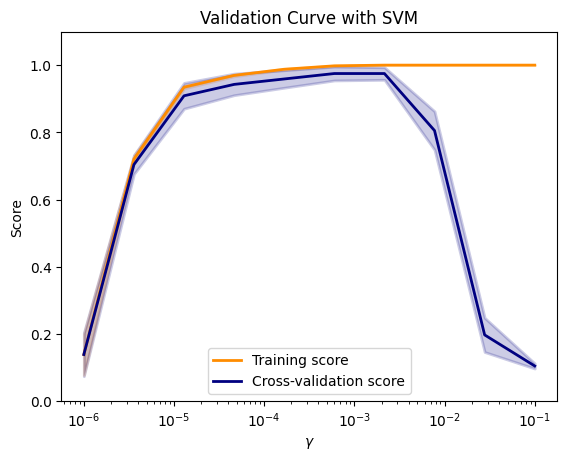

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
import pandas as pd
redwine = pd.read_csv('https://archive.ics.uci.edu'
                      '/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

In [11]:
%%time
selection = SelectKBest(k=1)
svm = SVC(kernel="linear")
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])
param_grid = dict(univ_select__k=[4, 5, 6, 7, 8, 9, 10, 11], 
                  svm__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, verbose=10)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.516 total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.584 total time=   0.1s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.516 total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.589 total time=   0.1s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END svm__C=0.1, univ_select__k=6;, score=0.519 total time=   0.1s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END svm__C=0.1, univ_select__k=6;

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('univ_select', SelectKBest(k=1)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'univ_select__k': [4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=10)

In [11]:
print(grid_search.best_estimator_)

Pipeline(steps=[('univ_select', SelectKBest(k=9)),
                ('svm', SVC(C=1, kernel='linear'))])


In [12]:
grid_search.best_params_

{'svm__C': 1, 'univ_select__k': 9}